# Figures for Fox et al. "Exceptional freshening and cooling in theeastern subpolar North Atlantic caused by reduced Labrador Sea surface heat loss."

### Figures 8


## Technical preamble

In [1]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import cartopy
import seawater as sw
from xhistogram.xarray import histogram


from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [2]:
sns.set(style="whitegrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend
plt.rc('savefig', dpi=300)       # higher res outputs

## Set up paths and read in trajectory data

In [3]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

inputPath = Path('data/processed/sumsAndMeans/noNorth/')
input_data_path = project_path / inputPath

# output figures path
figure_path = Path("reports/figures/coldBlob/final/")


In [4]:

# model mask file
data_path = Path("data/external/iAtlantic/")
experiment_name = "VIKING20X.L46-KKG36107B"
mesh_mask_file =  project_path / data_path / "mask" / experiment_name / "1_mesh_mask.nc"

#section lonlat file
sectionPath = Path('data/external/')
sectionFilename = 'osnap_pos_wp.txt'
sectionname = 'osnap'
gsrsectionFilename = 'gsr_pos_wp.txt'

degree2km = 1.852*60.0

# some transport values specific to osnap runs
# randomly seeded 39995 particles, 19886 were in ocean points (the rest were land)

osnap_section_length = 3594572.87839    # m
osnap_subsection_length = 2375914.29783   # m
osnap_section_depth = 4000 # m over which particles launched
osnap_subsection_depth = 1000 # m over which particles launched

osnap_subsection_ocean_area = osnap_subsection_length * osnap_subsection_depth * 2100000 / 2643886


max_current = 2.0

particle_section_area = max_current * osnap_subsection_length * osnap_subsection_depth / (2643886)

## Load data

## Load track sums and means data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

#### eastern section

In [5]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_e_sum_0 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_0_OsnapE_21_0_????.nc/")))
files_lc60w_e_sum_0 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_0_OsnapE_21_0_????.nc/")))
files_lcdir_e_sum_0 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_0_OsnapE_21_0_????.nc/")))


In [6]:
gulfs_e_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_e_sum_0],
    dim="time",
)
lc60w_e_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_e_sum_0],
    dim="time",
)
lcdir_e_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_e_sum_0],
    dim="time",
)


In [7]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_e_sum_1 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_1_OsnapE_21_0_????.nc/")))
files_lc60w_e_sum_1 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_1_OsnapE_21_0_????.nc/")))
files_lcdir_e_sum_1 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_1_OsnapE_21_0_????.nc/")))


In [8]:
gulfs_e_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_e_sum_1],
    dim="time",
)
lc60w_e_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_e_sum_1],
    dim="time",
)
lcdir_e_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_e_sum_1],
    dim="time",
)


In [9]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_e_mean_0 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_0_OsnapE_21_0_????.nc/")))
files_lc60w_e_mean_0 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_0_OsnapE_21_0_????.nc/")))
files_lcdir_e_mean_0 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_0_OsnapE_21_0_????.nc/")))


In [10]:
gulfs_e_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_e_mean_0],
    dim="time",
)
lc60w_e_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_e_mean_0],
    dim="time",
)
lcdir_e_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_e_mean_0],
    dim="time",
)


In [11]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_e_mean_1 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_1_OsnapE_21_0_????.nc/")))
files_lc60w_e_mean_1 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_1_OsnapE_21_0_????.nc/")))
files_lcdir_e_mean_1 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_1_OsnapE_21_0_????.nc/")))


In [12]:
gulfs_e_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_e_mean_1],
    dim="time",
)
lc60w_e_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_e_mean_1],
    dim="time",
)
lcdir_e_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_e_mean_1],
    dim="time",
)


#### western section

In [13]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_w_sum_0 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_0_OsnapE_37_21_????.nc/")))
files_lc60w_w_sum_0 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_0_OsnapE_37_21_????.nc/")))
files_lcdir_w_sum_0 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_0_OsnapE_37_21_????.nc/")))


In [14]:
gulfs_w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_w_sum_0],
    dim="time",
)
lc60w_w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_w_sum_0],
    dim="time",
)
lcdir_w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_w_sum_0],
    dim="time",
)


In [15]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_w_sum_1 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_1_OsnapE_37_21_????.nc/")))
files_lc60w_w_sum_1 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_1_OsnapE_37_21_????.nc/")))
files_lcdir_w_sum_1 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_1_OsnapE_37_21_????.nc/")))


In [16]:
gulfs_w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_w_sum_1],
    dim="time",
)
lc60w_w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_w_sum_1],
    dim="time",
)
lcdir_w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_w_sum_1],
    dim="time",
)


In [17]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_w_mean_0 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_0_OsnapE_37_21_????.nc/")))
files_lc60w_w_mean_0 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_0_OsnapE_37_21_????.nc/")))
files_lcdir_w_mean_0 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_0_OsnapE_37_21_????.nc/")))


In [18]:
gulfs_w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_w_mean_0],
    dim="time",
)
lc60w_w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_w_mean_0],
    dim="time",
)
lcdir_w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_w_mean_0],
    dim="time",
)


In [19]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_gulfs_w_mean_1 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_1_OsnapE_37_21_????.nc/")))
files_lc60w_w_mean_1 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_1_OsnapE_37_21_????.nc/")))
files_lcdir_w_mean_1 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_1_OsnapE_37_21_????.nc/")))


In [20]:
gulfs_w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_w_mean_1],
    dim="time",
)
lc60w_w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_w_mean_1],
    dim="time",
)
lcdir_w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_w_mean_1],
    dim="time",
)


In [22]:
gulfs_w_sum_0

<xarray.Dataset>
Dimensions:           (subsetno: 32, time: 2189)
Coordinates:
  * time              (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-2...
Dimensions without coordinates: subsetno
Data variables: (12/37)
    obs2d             (subsetno, time) float64 4.539e+04 3.616e+04 ... 2.443e+04
    lat               (subsetno, time) float32 1.144e+04 1.015e+04 ... 4.655e+03
    lon               (subsetno, time) float32 -5.239e+03 ... -2.025e+03
    mxl               (subsetno, time) float32 5.953e+04 5.831e+04 ... 1.255e+04
    salt              (subsetno, time) float32 6.916e+03 6.141e+03 ... 2.792e+03
    temp              (subsetno, time) float32 1.754e+03 1.572e+03 ... 639.2
    ...                ...
    lon_transport     (subsetno, time) float64 -9.415 -8.262 ... -3.727 -3.639
    tempxvol          (subsetno, time) float64 20.2 24.09 26.48 ... 14.38 14.57
    saltxvol          (subsetno, time) float64 83.8 97.06 111.8 ... 62.03 63.86
    depthxvol         (subsetno, time) float64 555.7 633.5 754.8 ... 444.4 395.5
    lonxvol           (subsetno, time) float64 -66.99 -74.69 ... -43.95 -46.0
    deltat            (subsetno, time) float64 1.961e+19 1.562e+19 ... 1.055e+19
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.2.2

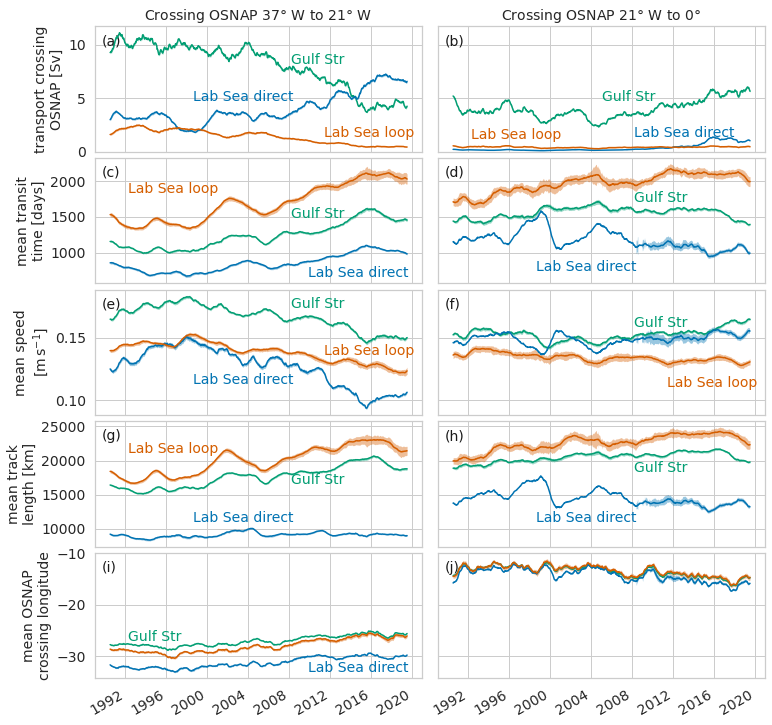

In [23]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = (ds.rolling(time=roll,center=True).mean()).std(dim='subsetno')
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12),sharex='col',sharey='row',gridspec_kw={'hspace':0.05,'wspace':0.05})


ax = axes[0,0]
plot_ts_with_errorbars(gulfs_w_sum_0.vol_trans_normal*32.0,73,ax,'C2')
plot_ts_with_errorbars(lcdir_w_sum_0.vol_trans_normal*32.0,73,ax,'C0')
plot_ts_with_errorbars(lc60w_w_sum_0.vol_trans_normal*32.0,73,ax,'C3')
ax.set_ylabel('transport crossing\nOSNAP [Sv]')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
ax.text(0.02,0.85,'(a)',transform=ax.transAxes, color='k')
ax.text(0.6,0.7,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.7,0.12,'Lab Sea loop',transform=ax.transAxes, color='C3')
ax.text(0.3,0.4,'Lab Sea direct',transform=ax.transAxes, color='C0')
ax.set_title('Crossing OSNAP $37\degree$ W to $21\degree$ W')

ax = axes[1,0]
plot_ts_with_errorbars(gulfs_w_mean_1.deltat/(1.0e9*24*3600),73,ax,'C2')
plot_ts_with_errorbars(lcdir_w_mean_1.deltat/(1.0e9*24*3600),73,ax,'C0')
plot_ts_with_errorbars(lc60w_w_mean_1.deltat/(1.0e9*24*3600),73,ax,'C3')
ax.set_ylabel('mean transit\ntime [days]')
ax.set_xlabel('')
ax.text(0.02,0.85,'(c)',transform=ax.transAxes, color='k')
ax.text(0.6,0.52,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.1,0.72,'Lab Sea loop',transform=ax.transAxes, color='C3')
ax.text(0.65,0.05,'Lab Sea direct',transform=ax.transAxes, color='C0')

ax = axes[2,0]
plot_ts_with_errorbars((gulfs_w_mean_1.dist)/(gulfs_w_mean_1.deltat/(1.0e9)),73,ax,'C2')
plot_ts_with_errorbars((lcdir_w_mean_1.dist)/(lcdir_w_mean_1.deltat/(1.0e9)),73,ax,'C0')
plot_ts_with_errorbars((lc60w_w_mean_1.dist)/(lc60w_w_mean_1.deltat/(1.0e9)),73,ax,'C3')
ax.set_ylabel('mean speed\n[$\mathrm{m\, s^{-1}}$]')
ax.set_xlabel('')
ax.text(0.02,0.85,'(e)',transform=ax.transAxes, color='k')
ax.text(0.6,0.85,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.7,0.48,'Lab Sea loop',transform=ax.transAxes, color='C3')
ax.text(0.3,0.25,'Lab Sea direct',transform=ax.transAxes, color='C0')

ax = axes[3,0]
plot_ts_with_errorbars(gulfs_w_mean_1.dist/1000.0,73,ax,'C2')
plot_ts_with_errorbars(lcdir_w_mean_1.dist/1000.0,73,ax,'C0')
plot_ts_with_errorbars(lc60w_w_mean_1.dist/1000.0,73,ax,'C3')
ax.set_ylabel('mean track\nlength [km]')
ax.set_xlabel('')
ax.text(0.02,0.85,'(g)',transform=ax.transAxes, color='k')
ax.text(0.6,0.5,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.1,0.75,'Lab Sea loop',transform=ax.transAxes, color='C3')
ax.text(0.3,0.2,'Lab Sea direct',transform=ax.transAxes, color='C0')

ax = axes[4,0]
plot_ts_with_errorbars(gulfs_w_mean_0.lon,73,ax,'C2')
plot_ts_with_errorbars(lcdir_w_mean_0.lon,73,ax,'C0')
plot_ts_with_errorbars(lc60w_w_mean_0.lon,73,ax,'C3')
ax.set_ylabel('mean OSNAP\ncrossing longitude')
ax.set_xlabel('')
ax.text(0.02,0.85,'(i)',transform=ax.transAxes, color='k')
ax.text(0.1,0.3,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.65,0.05,'Lab Sea direct',transform=ax.transAxes, color='C0')


ax = axes[0,1]
plot_ts_with_errorbars(gulfs_e_sum_0.vol_trans_normal*32.0,73,ax,'C2')
plot_ts_with_errorbars(lcdir_e_sum_0.vol_trans_normal*32.0,73,ax,'C0')
plot_ts_with_errorbars(lc60w_e_sum_0.vol_trans_normal*32.0,73,ax,'C3')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
ax.text(0.02,0.85,'(b)',transform=ax.transAxes, color='k')
ax.text(0.5,0.4,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.6,0.12,'Lab Sea direct',transform=ax.transAxes, color='C0')
ax.text(0.1,0.10,'Lab Sea loop',transform=ax.transAxes, color='C3')
ax.set_title('Crossing OSNAP $21\degree$ W to $0\degree$')

ax = axes[1,1]
plot_ts_with_errorbars(gulfs_e_mean_1.deltat/(1.0e9*24*3600),73,ax,'C2')
plot_ts_with_errorbars(lcdir_e_mean_1.deltat/(1.0e9*24*3600),73,ax,'C0')
plot_ts_with_errorbars(lc60w_e_mean_1.deltat/(1.0e9*24*3600),73,ax,'C3')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.02,0.85,'(d)',transform=ax.transAxes, color='k')
ax.text(0.6,0.65,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.3,0.1,'Lab Sea direct',transform=ax.transAxes, color='C0')

ax = axes[2,1]
plot_ts_with_errorbars((gulfs_e_mean_1.dist)/(gulfs_e_mean_1.deltat/(1.0e9)),73,ax,'C2')
plot_ts_with_errorbars((lcdir_e_mean_1.dist)/(lcdir_e_mean_1.deltat/(1.0e9)),73,ax,'C0')
plot_ts_with_errorbars((lc60w_e_mean_1.dist)/(lc60w_e_mean_1.deltat/(1.0e9)),73,ax,'C3')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.02,0.85,'(f)',transform=ax.transAxes, color='k')
ax.text(0.6,0.7,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.7,0.22,'Lab Sea loop',transform=ax.transAxes, color='C3')

ax = axes[3,1]
plot_ts_with_errorbars(gulfs_e_mean_1.dist/1000.0,73,ax,'C2')
plot_ts_with_errorbars(lcdir_e_mean_1.dist/1000.0,73,ax,'C0')
plot_ts_with_errorbars(lc60w_e_mean_1.dist/1000.0,73,ax,'C3')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.02,0.85,'(h)',transform=ax.transAxes, color='k')
ax.text(0.6,0.6,'Gulf Str',transform=ax.transAxes, color='C2')
ax.text(0.3,0.2,'Lab Sea direct',transform=ax.transAxes, color='C0')

ax = axes[4,1]
plot_ts_with_errorbars(gulfs_e_mean_0.lon,73,ax,'C2')
plot_ts_with_errorbars(lcdir_e_mean_0.lon,73,ax,'C0')
plot_ts_with_errorbars(lc60w_e_mean_0.lon,73,ax,'C3')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.02,0.85,'(j)',transform=ax.transAxes, color='k')


plt.savefig(project_path / figure_path / 'f08.png',dpi=300, bbox_inches='tight')
plt.savefig(project_path / figure_path / 'f08.pdf',dpi=300, bbox_inches='tight')

